In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy  as np
%matplotlib inline
from matplotlib.animation import FuncAnimation
sns.set(rc={'figure.figsize':(12, 12)}, font_scale=1.2)
from datetime import datetime

In [ ]:
file1 = pd.read_csv('/content/covid_19_data.csv')

In [ ]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60070 entries, 0 to 60069
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              60070 non-null  object 
 1   ObservationDate  58923 non-null  object 
 2   Province/State   36339 non-null  object 
 3   Country/Region   58922 non-null  object 
 4   Last Update      58922 non-null  object 
 5   Confirmed        58922 non-null  float64
 6   Deaths           58922 non-null  float64
 7   Recovered        58922 non-null  float64
dtypes: float64(3), object(5)
memory usage: 3.7+ MB


In [ ]:
file1.head(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
file1.sample(20)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
35957,35958,06/05/2020,Halland,Sweden,2021-04-02 15:13:53,870.0,56.0,0.0
14662,14663,04/12/2020,Ohio,US,2020-04-12 23:25:00,6604.0,362.0,0.0
43839,43840,06/16/2020,Jamtland Harjedalen,Sweden,2021-04-02 15:13:53,920.0,40.0,0.0
23694,23695,05/10/2020,French Guiana,France,2021-04-02 15:13:53,144.0,1.0,122.0
21091,21092,05/02/2020,Guizhou,Mainland China,2020-05-03 02:32:28,147.0,2.0,145.0
12240,12241,04/05/2020,NaN,North Macedonia,2020-04-05 23:13:44,555.0,18.0,23.0
51241,51242,06/26/2020,Manipur,India,2021-04-02 15:13:53,1075.0,0.0,393.0
4338,"4339,03/08/2020,""Travis, CA (From Diamond Prin...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
44957,44958,06/18/2020,NaN,Cabo Verde,2021-04-02 15:13:53,823.0,7.0,377.0
18913,18914,04/25/2020,Yukon,Canada,2020-04-26 02:31:18,11.0,0.0,0.0


In [ ]:
file1.describe().T

,count,mean,std,min,25%,50%,75%,max
Confirmed,58922.0,9374.606870,29421.682600,0.0,94.0,863.0,4639.0,405843.0
Deaths,58922.0,536.529463,2479.630195,0.0,1.0,13.0,147.0,41128.0
Recovered,58922.0,4045.840314,22478.879423,0.0,0.0,104.0,1198.0,936476.0
Year,58923.0,2020.000000,0.000000,2020.0,2020.0,2020.0,2020.0,2020.0
Month,58923.0,5.003411,1.360849,1.0,4.0,5.0,6.0,7.0
Week,58923.0,20.278329,5.726808,4.0,16.0,22.0,25.0,28.0
Day,58923.0,15.501570,9.100114,1.0,7.0,16.0,24.0,31.0
Week_Day,58923.0,2.980466,2.003800,0.0,1.0,3.0,5.0,6.0
Hour,58923.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Minute,58923.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
file1.shape

(306429, 8)

In [ ]:
file1.isnull().sum()

SNo                    0
ObservationDate     1798
Province/State     79890
Country/Region      1798
Last Update         1798
Confirmed           1798
Deaths              1798
Recovered           1798
dtype: int64

In [ ]:
grouped_country=file1[["Province/State","Country/Region","Deaths","Recovered","Confirmed"]]
grouped_country

,Province/State,Country/Region,Deaths,Recovered,Confirmed
0,Anhui,Mainland China,0.0,0.0,1.0
1,Beijing,Mainland China,0.0,0.0,14.0
2,Chongqing,Mainland China,0.0,0.0,6.0
3,Fujian,Mainland China,0.0,0.0,1.0
4,Gansu,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
60065,Molise,Italy,23.0,405.0,445.0
60066,Montana,US,23.0,0.0,1371.0
60067,Montserrat,UK,1.0,10.0,11.0
60068,Moquegua,Peru,20.0,0.0,1182.0


In [ ]:
grouped_country = grouped_country.sort_values(by="Deaths",ascending=False)
grouped_country = grouped_country.reset_index(drop=True)
grouped_country

,Province/State,Country/Region,Deaths,Recovered,Confirmed
0,NaN,UK,41128.0,0.0,290143.0
1,NaN,UK,40883.0,0.0,289140.0
2,NaN,UK,40597.0,0.0,287399.0
3,NaN,UK,40542.0,0.0,286194.0
4,NaN,UK,40465.0,0.0,284868.0
...,...,...,...,...,...
60065,NaN,NaN,NaN,NaN,NaN
60066,NaN,NaN,NaN,NaN,NaN
60067,NaN,NaN,NaN,NaN,NaN
60068,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1=pd.read_csv("/content/covid_19_data.csv", parse_dates=['Last Update'])
df1.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


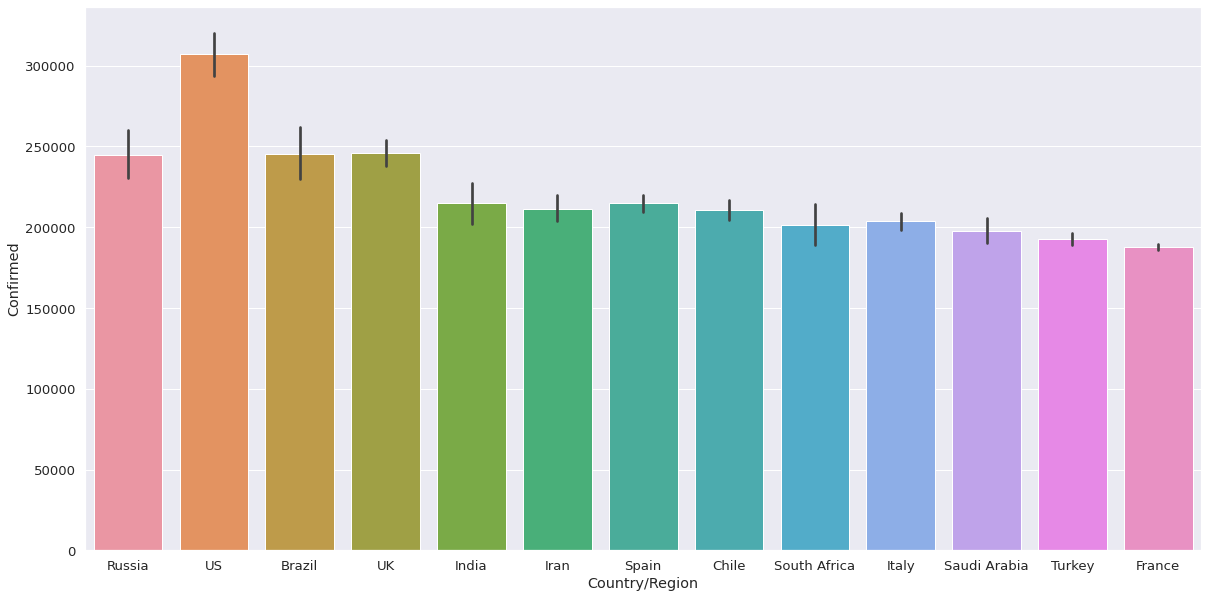

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(y='Confirmed', x='Country/Region', data=grouped_country.nlargest(500,'Confirmed'))

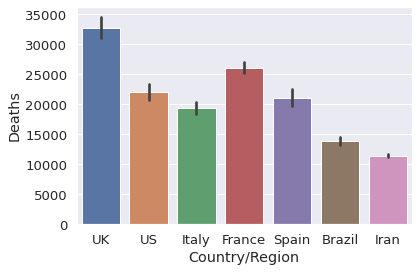

In [ ]:
sns.barplot(y='Deaths', x='Country/Region', data=grouped_country.nlargest(500,'Deaths'))

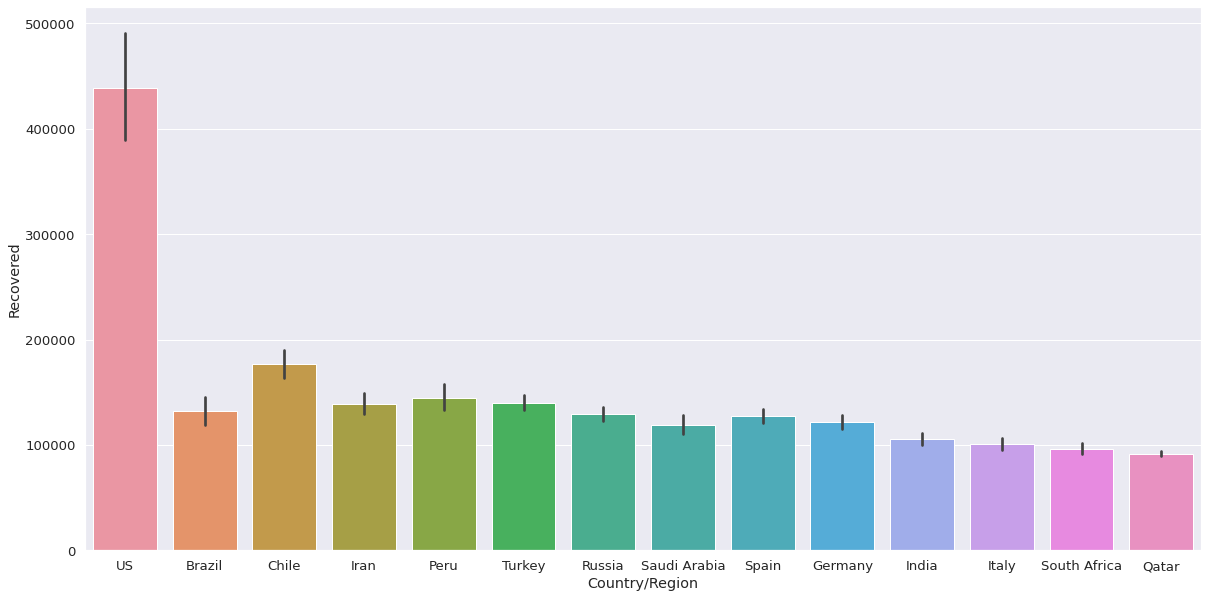

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(y='Recovered', x='Country/Region', data=grouped_country.nlargest(500,'Recovered'))

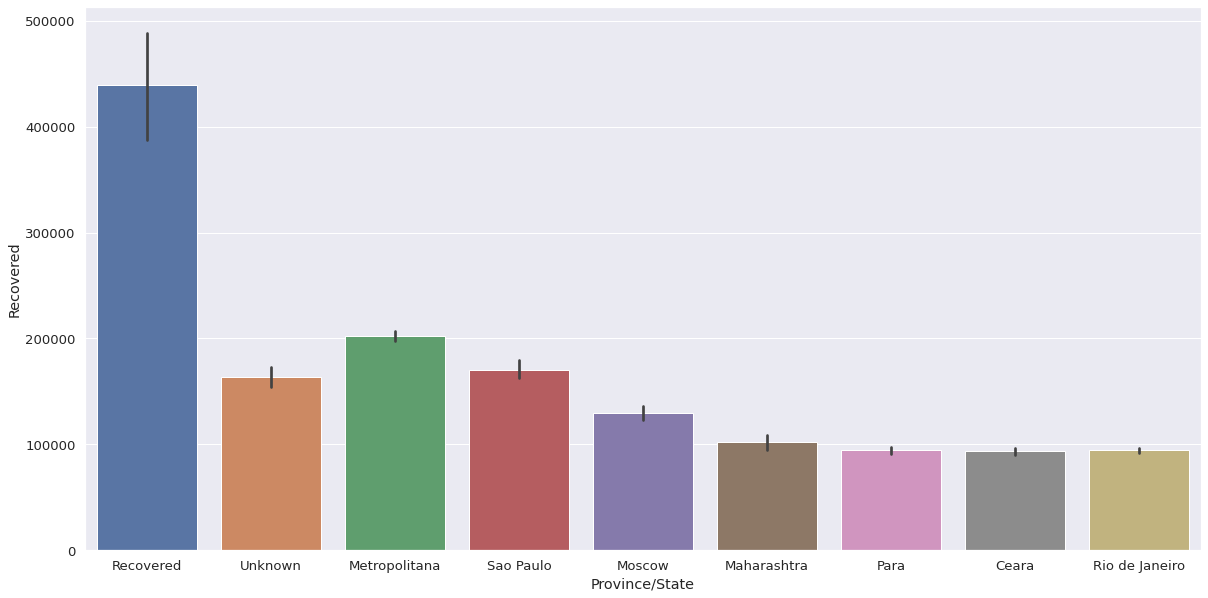

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(y='Recovered', x='Province/State', data=grouped_country.nlargest(500,'Recovered'))

In [ ]:
recoverd_largest=file1.loc[lambda df: df['Recovered'] >=2000000.0]
recoverd_largest

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date,Year,Month,Month_Name,Week,Day,Week_Day,Day_Name,Hour,Minute


In [ ]:
deaths_largest=file1.loc[lambda df: df['Deaths'] >=60000.0]
deaths_largest

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date,Year,Month,Month_Name,Week,Day,Week_Day,Day_Name,Hour,Minute


ValueError: ignored

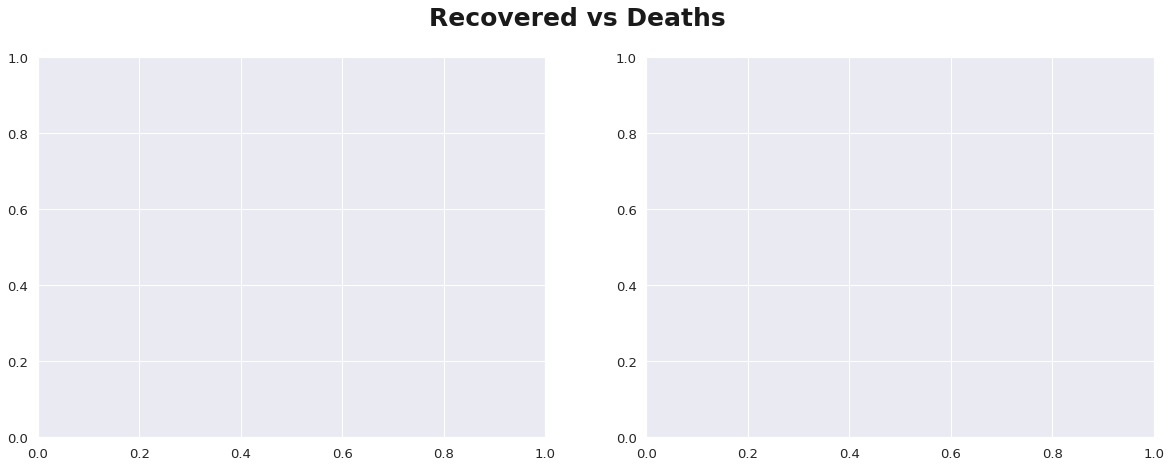

In [ ]:
fig, axes = plt.subplots(1,2 , figsize= (20,7)) 
fig.suptitle ('Recovered vs Deaths',fontsize=25,color='k',fontweight='bold')
sns.barplot(ax=axes [0], x='Country/Region', y="Recovered", data=recoverd_largest )
sns.barplot(ax=axes [1],  x='Country/Region', y="Deaths", data=deaths_largest)

In [ ]:
Confirmed_largest=file1.loc[lambda df: df['Confirmed'] >=1900000.0]
Confirmed_largest

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
154382,154383,11/12/2020,NaN,France,2021-04-02 15:13:53,1902644.0,42640.0,114275.0
155144,155145,11/13/2020,NaN,France,2021-04-02 15:13:53,1926314.0,43572.0,115928.0
155906,155907,11/14/2020,NaN,France,2021-04-02 15:13:53,1958235.0,43925.0,117913.0
156668,156669,11/15/2020,NaN,France,2021-04-02 15:13:53,1985427.0,44227.0,118583.0
157430,157431,11/16/2020,NaN,France,2021-04-02 15:13:53,1994728.0,44733.0,119653.0
...,...,...,...,...,...,...,...,...
306127,306128,05/29/2021,Maharashtra,India,2021-05-30 04:20:55,5713215.0,94030.0,5339838.0
306185,306186,05/29/2021,New York,US,2021-05-30 04:20:55,2101055.0,53269.0,0.0
306292,306293,05/29/2021,Sao Paulo,Brazil,2021-05-30 04:20:55,3254893.0,111123.0,2895697.0
306330,306331,05/29/2021,Tamil Nadu,India,2021-05-30 04:20:55,2039716.0,23261.0,1706298.0


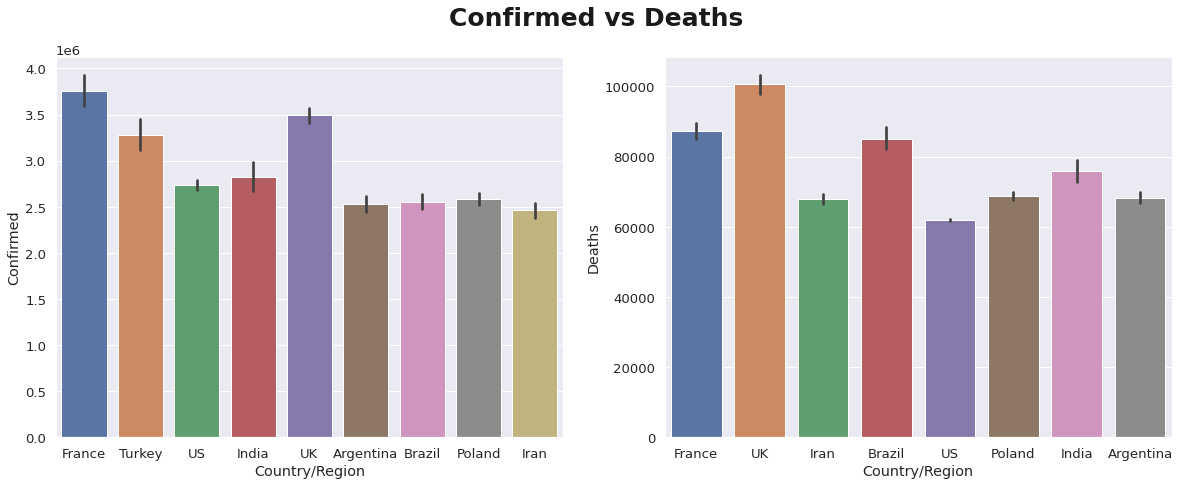

In [ ]:
fig, axes = plt.subplots(1,2 , figsize= (20,7)) 
fig.suptitle ('Confirmed vs Deaths',fontsize=25,color='k',fontweight='bold')
sns.barplot(ax=axes [0], x='Country/Region', y="Confirmed", data=Confirmed_largest )
sns.barplot(ax=axes [1],  x='Country/Region', y="Deaths", data=deaths_largest)

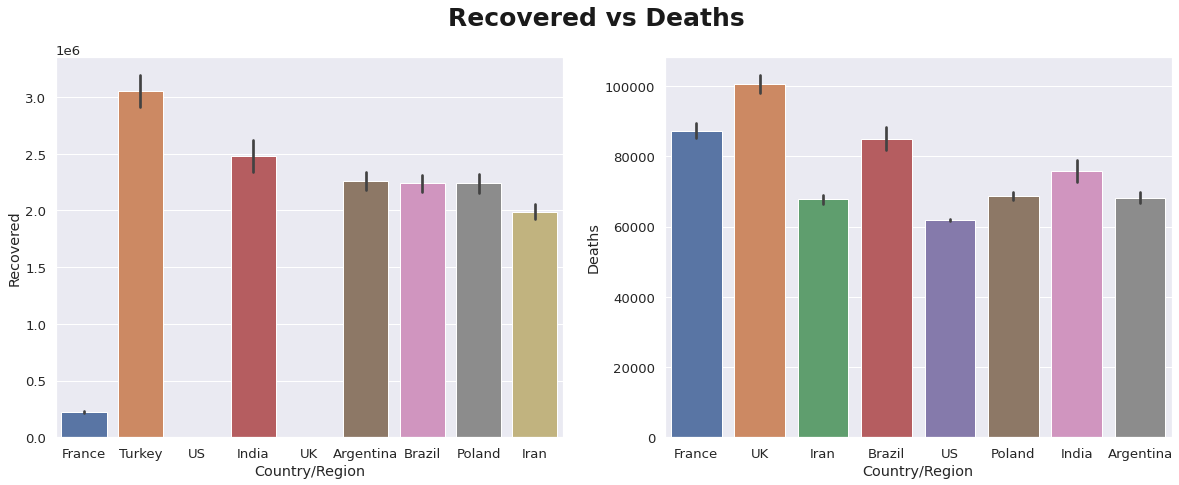

In [ ]:
fig, axes = plt.subplots(1,2 , figsize= (20,7)) 
fig.suptitle ('Recovered vs Deaths',fontsize=25,color='k',fontweight='bold')
sns.barplot(ax=axes [0], x='Country/Region', y="Recovered", data=Confirmed_largest )
sns.barplot(ax=axes [1],  x='Country/Region', y="Deaths", data=deaths_largest)

# **Date and Time Features**

In [ ]:
file1["ObservationDate"] = pd.to_datetime(file1.ObservationDate)
file1.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date,Year,Month,Month_Name,Week,Day,Week_Day,Day_Name,Hour,Minute
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22,2020.0,1.0,January,4,22.0,2.0,Wednesday,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,2020-01-22,2020.0,1.0,January,4,22.0,2.0,Wednesday,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,2020-01-22,2020.0,1.0,January,4,22.0,2.0,Wednesday,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22,2020.0,1.0,January,4,22.0,2.0,Wednesday,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,2020-01-22,2020.0,1.0,January,4,22.0,2.0,Wednesday,0.0,0.0


In [ ]:
day = file1.ObservationDate.unique()
day=day[:188]

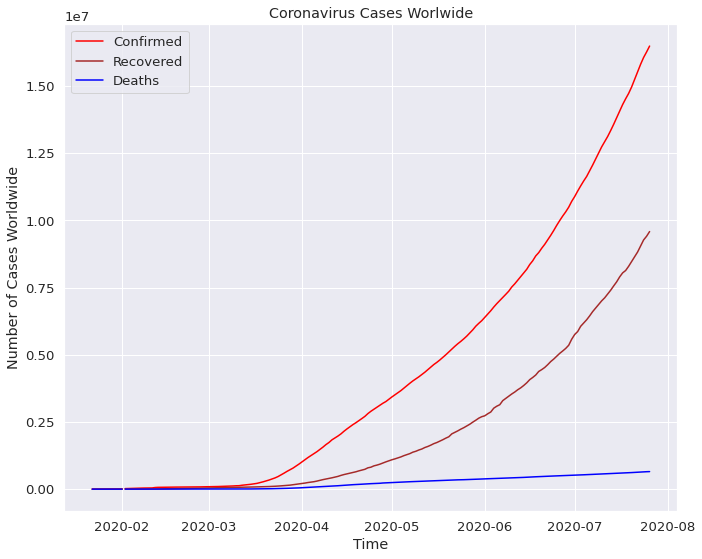

In [ ]:
plt.figure(figsize=(10,8))
active =file1.groupby(["ObservationDate"]).Confirmed.sum()
recovered = file1.groupby(["ObservationDate"]).Recovered.sum()
death = file1.groupby(["ObservationDate"]).Deaths.sum()

plt.plot(day,active, label= "Confirmed", color = "red")
plt.plot(day,recovered, label= "Recovered", color = "brown")
plt.plot(day,death, label = "Deaths", color = "blue")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Number of Cases Worldwide")
plt.title("Coronavirus Cases Worlwide")
plt.tight_layout()
plt.show;

In [ ]:
file1["ObservationDate"] = pd.to_datetime(file1["ObservationDate"])
file1['ObservationDate'] = pd.to_datetime(file1['ObservationDate'],format='%m/%d/%Y %H:%M', errors="coerce")
file1['ObservationDate']

0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
60065   2020-07-08
60066   2020-07-08
60067   2020-07-08
60068   2020-07-08
60069   2020-07-08
Name: ObservationDate, Length: 60070, dtype: datetime64[ns]

In [ ]:
file1['Date']= file1['ObservationDate'].dt.date
file1['Year'] = file1['ObservationDate'].dt.year
file1['Month'] = file1['ObservationDate'].dt.month
file1['Month_Name'] = file1['ObservationDate'].dt.month_name()
file1['Week'] =file1['ObservationDate'].dt.isocalendar().week
file1['Day'] = file1['ObservationDate'].dt.day
file1['Week_Day'] = file1['ObservationDate'].dt.weekday
file1['Day_Name'] = file1['ObservationDate'].dt.day_name()
file1['Hour'] = file1['ObservationDate'].dt.hour
file1['Minute'] = file1['ObservationDate'].dt.minute
file1.sample(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date,Year,Month,Month_Name,Week,Day,Week_Day,Day_Name,Hour,Minute
9861,9862,2020-03-28,Sichuan,Mainland China,3/8/20 5:31,548.0,3.0,536.0,2020-03-28,2020.0,3.0,March,13,28.0,5.0,Saturday,0.0,0.0
57828,57829,2020-07-05,Lviv Oblast,Ukraine,2021-04-02 15:13:53,6197.0,162.0,890.0,2020-07-05,2020.0,7.0,July,27,5.0,6.0,Sunday,0.0,0.0
37507,37508,2020-06-07,Okinawa,Japan,2021-04-02 15:13:53,145.0,6.0,137.0,2020-06-07,2020.0,6.0,June,23,7.0,6.0,Sunday,0.0,0.0
6995,6996,2020-03-19,NaN,Georgia,2020-03-19T10:53:03,40.0,0.0,1.0,2020-03-19,2020.0,3.0,March,12,19.0,3.0,Thursday,0.0,0.0
50254,50255,2020-06-25,Antioquia,Colombia,2021-04-02 15:13:53,3239.0,19.0,1261.0,2020-06-25,2020.0,6.0,June,26,25.0,3.0,Thursday,0.0,0.0
9392,9393,2020-03-27,NaN,Rwanda,2020-03-27 23:27:48,54.0,0.0,0.0,2020-03-27,2020.0,3.0,March,13,27.0,4.0,Friday,0.0,0.0
36189,"36190,06/05/2020,""Saint Helena, Ascension and ...",NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN
32889,32890,2020-05-31,Shiga,Japan,2021-04-02 15:13:53,100.0,1.0,91.0,2020-05-31,2020.0,5.0,May,22,31.0,6.0,Sunday,0.0,0.0
41022,41023,2020-06-12,Narino,Colombia,2021-04-02 15:13:53,2030.0,72.0,633.0,2020-06-12,2020.0,6.0,June,24,12.0,4.0,Friday,0.0,0.0
4563,"4564,03/09/2020,""Hudson County, NJ"",US,2020-03...",NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN


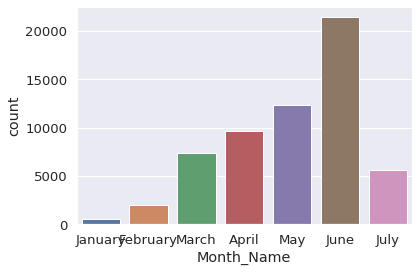

In [ ]:
sns.countplot(x=file1['Month_Name'])

## **Data Cleaning**

In [ ]:
# replacing Mainland china with just China
file1['Country/Region'] = file1['Country/Region'].replace('Mainland China', 'China')

# filling missing values with NA
file1[['Province/State']] = file1[['Province/State']].fillna('NA')